In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Reshape
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import pathlib
import re
# import tensorflow_datasets as tfds

In [2]:
X_train = tf.keras.utils.image_dataset_from_directory(
    '/Users/AtinDhawan/downloads/cropped/cropped/train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
#     class_names = ,
#     shuffle=False,
    seed=123,
    validation_split=0.3,
    subset="both")
#     interpolation="bilinear")
#     ,follow_links=False,
#     crop_to_aspect_ratio=False)

Found 12000 files belonging to 120 classes.
Using 8400 files for training.
Using 3600 files for validation.


In [3]:
class_names = X_train[0].class_names

In [4]:
new_class_names = [i[10:] for i in class_names]
new_class_names

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black-and-tan_coonhound',
 'Walker_hound',
 'English_foxhound',
 'redbone',
 'borzoi',
 'Irish_wolfhound',
 'Italian_greyhound',
 'whippet',
 'Ibizan_hound',
 'Norwegian_elkhound',
 'otterhound',
 'Saluki',
 'Scottish_deerhound',
 'Weimaraner',
 'Staffordshire_bullterrier',
 'American_Staffordshire_terrier',
 'Bedlington_terrier',
 'Border_terrier',
 'Kerry_blue_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Norwich_terrier',
 'Yorkshire_terrier',
 'wire-haired_fox_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Airedale',
 'cairn',
 'Australian_terrier',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier',
 'West_Highland_wh

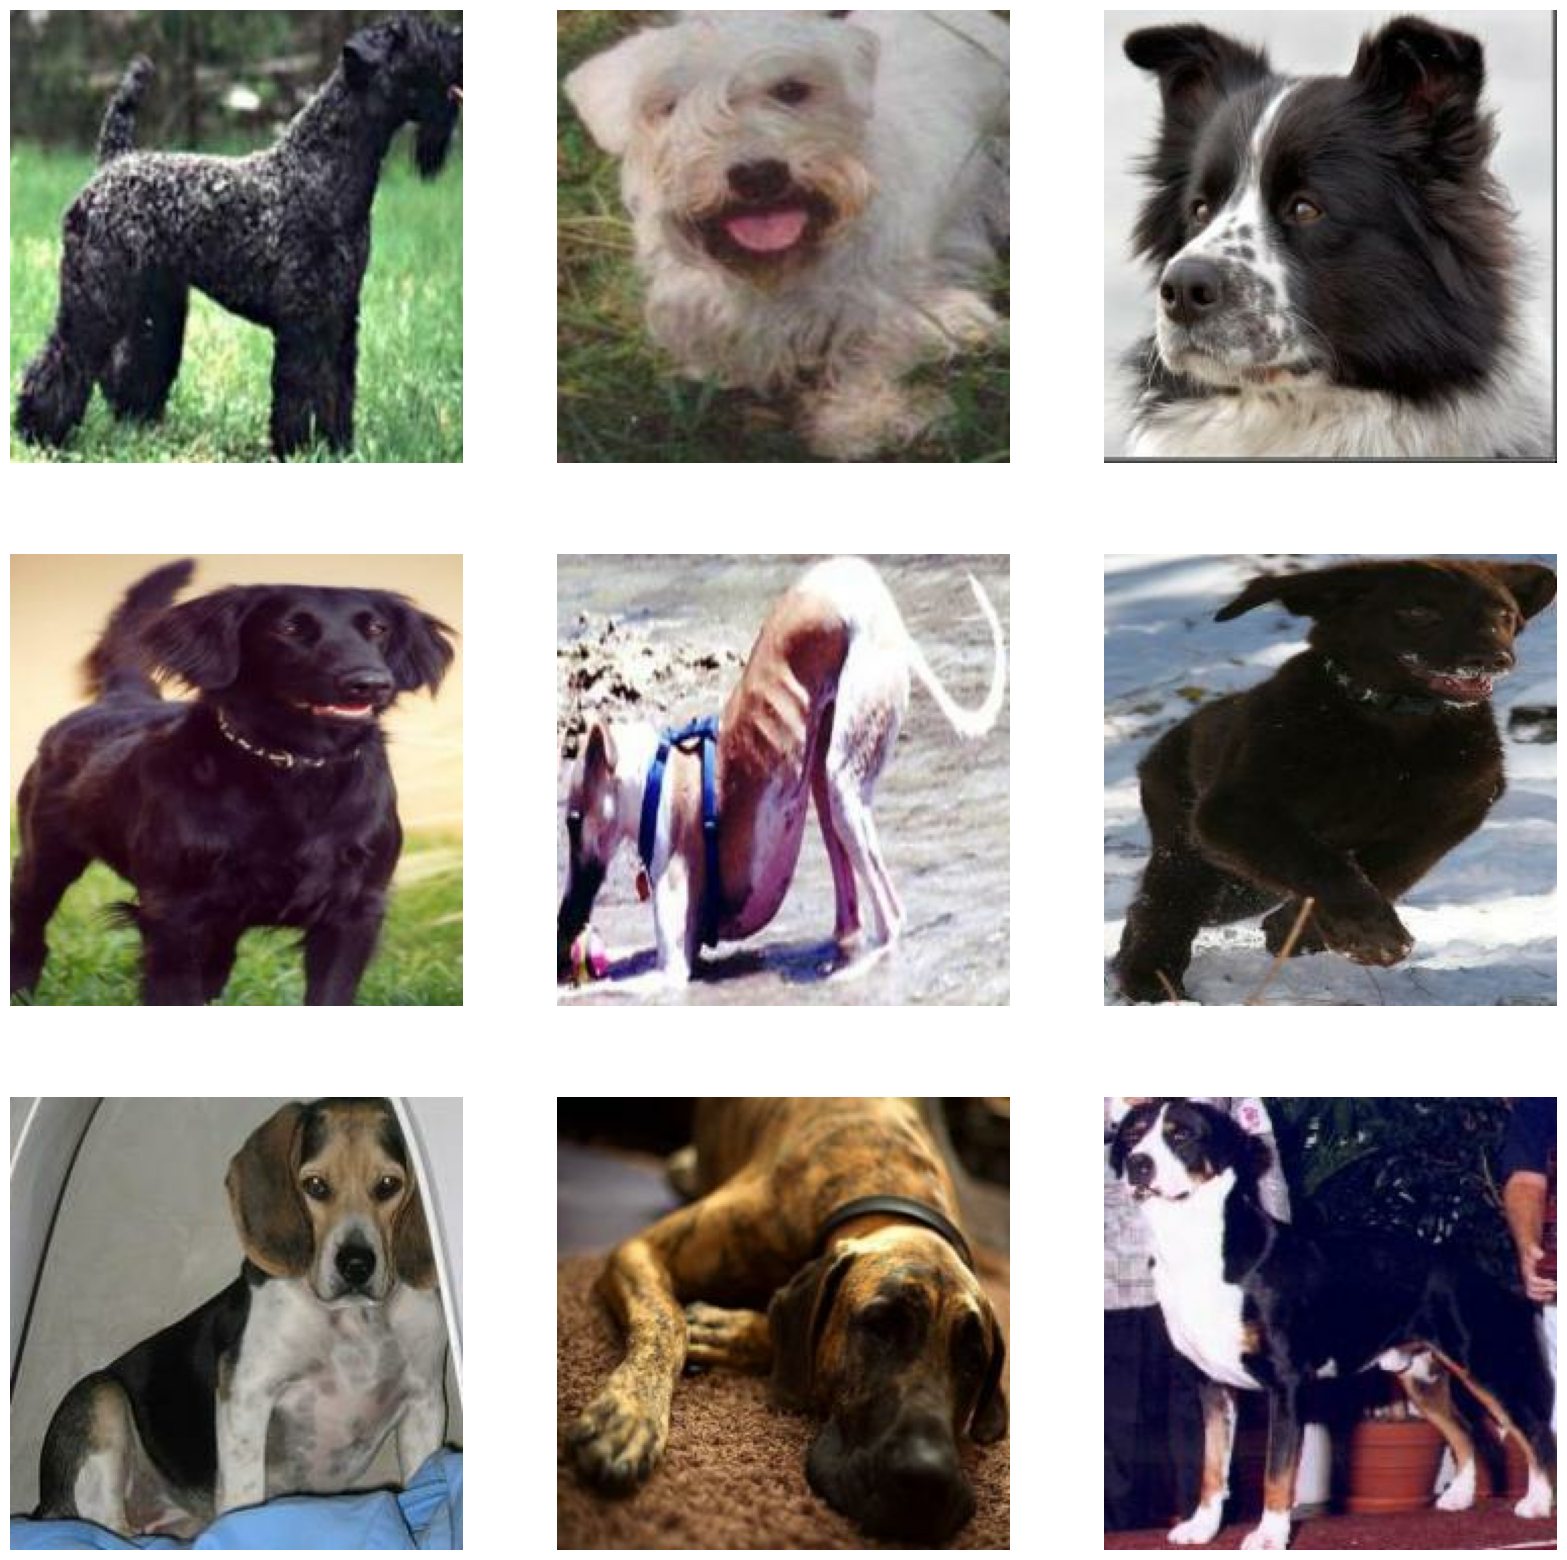

In [5]:
plt.figure(figsize=(20, 20))

for images, labels in X_train[0].take(1):
    for i in range(9):
#         print(labels[i])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
    #     plt.title(new_class_names[labels[i]])
        plt.axis("off")
    

In [6]:
X_train2 = np.asarray(X_train)

In [7]:
y_train = np.asarray(new_class_names)
y_train

array(['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese',
       'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier',
       'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle',
       'bloodhound', 'bluetick', 'black-and-tan_coonhound',
       'Walker_hound', 'English_foxhound', 'redbone', 'borzoi',
       'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound',
       'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound',
       'Weimaraner', 'Staffordshire_bullterrier',
       'American_Staffordshire_terrier', 'Bedlington_terrier',
       'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier',
       'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier',
       'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier',
       'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont',
       'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer',
       'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier',
       'silky

In [8]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(16, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(layers.MaxPool2D(pool_size=(2,2))) 

model.add(layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2))) 

model.add(layers.Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2))) 

model.add(layers.Conv2D(128 ,kernel_size = (3,3) , padding = 'same' , activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))     
          
model.add(layers.Flatten())
model.add(layers.Dense(120, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [11]:
directories = os.listdir('/Users/atindhawan/Downloads/cropped/cropped/test/')

images = []
annot = []
new_class_names = []

for directory in directories:
#     new_class_names.append(directory[10:])
    image_files = os.path.join('/Users/atindhawan/Downloads/cropped/cropped/test/', directory)
    new_path = os.listdir(os.path.join('/Users/atindhawan/Downloads/cropped/cropped/test/', directory))
    images.extend([os.path.join('/Users/atindhawan/Downloads/cropped/cropped/test/', directory, f) for f in new_path])
    annot.extend([os.path.join('test/',directory,f.replace(".jpg","")) for f in new_path])
#     for file in directory:
#         print(file)

In [24]:
new_class_names

['silky_terrier',
 'Scottish_deerhound',
 'Chesapeake_Bay_retriever',
 'Ibizan_hound',
 'wire-haired_fox_terrier',
 'Saluki',
 'cocker_spaniel',
 'schipperke',
 'borzoi',
 'Pembroke',
 'komondor',
 'Staffordshire_bullterrier',
 'standard_poodle',
 'Eskimo_dog',
 'English_foxhound',
 'golden_retriever',
 'Sealyham_terrier',
 'Japanese_spaniel',
 'miniature_schnauzer',
 'malamute',
 'malinois',
 'Pekinese',
 'giant_schnauzer',
 'Mexican_hairless',
 'Doberman',
 'standard_schnauzer',
 'dhole',
 'German_shepherd',
 'Bouvier_des_Flandres',
 'Siberian_husky',
 'Norwich_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Saint_Bernard',
 'Border_terrier',
 'briard',
 'Tibetan_mastiff',
 'bull_mastiff',
 'Maltese_dog',
 'Kerry_blue_terrier',
 'kuvasz',
 'Greater_Swiss_Mountain_dog',
 'Lakeland_terrier',
 'Blenheim_spaniel',
 'basset',
 'West_Highland_white_terrier',
 'Chihuahua',
 'Border_collie',
 'redbone',
 'Irish_wolfhound',
 'bluetick',
 'miniature_poodle',
 'Cardigan',
 'EntleBucher',
 'No

In [12]:
images

['/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_9222.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_422.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_7970.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_10567.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_1469.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_1910.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_5223.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_10997.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_3484.jpg',
 '/Users/atindhawan/Downloads/cropped/cropped/test/n02097658-silky_terrier/n02097658_7619.jpg',
 '/Users/atindhawan/Downloads/cropped/c

In [15]:
def load_image(folder_name):
    image = tf.io.read_file(folder_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224,224])
#     new_class_names = [i[10:] for i in class_names]
    
    return image


In [16]:
lst_of_imgs = []
for i in images:
    lst_of_imgs.append(load_image(i))



In [19]:
len(lst_of_imgs)

8580

In [27]:
X_train_2 = np.asarray(lst_of_imgs)
X_train_2
X_train_2.shape

(8580, 224, 224, 3)

In [21]:
model.compile(loss = 'categorical_crossentrophy', optimizer = 'adam', metrics = '[accuracy]')

In [26]:
y_train[4]

'Shih-Tzu'

In [ ]:
y_cat_train = to_categorical(y_train, num_classes = 120)
y_cat_train.shape

In [22]:
model.fit(X_train2, y_train, epochs = 25, batch_size = 32, verbose = 1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type _BatchDataset).

In [ ]:
# Model Evaluation 
# print(model.evaluate(X_test,))
